# Plot model diagram

## Import modules

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import pandas as pd
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE

%matplotlib inline

## Load data

In [2]:
tips = pd.read_csv(
    "../results/builds/natural/natural_sample_1_with_90_vpm_sliding/tip_attributes_with_weighted_distances.tsv",
    sep="\t"
)

In [120]:
df = tips.query("timepoint == '1996-10-01' | timepoint == '1997-10-01'").loc[
    :,
    [
        "strain",
        "timepoint",
        "raw_date",
        "numdate",
        "frequency",
        "aa_sequence"
    ]
].copy()

In [121]:
df.head()

,strain,timepoint,raw_date,numdate,frequency,aa_sequence
0,A/Fujian/126/1996,1996-10-01,1996-05-01,1996.334018,0.004375,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...
1,A/Fujian/152/1996,1996-10-01,1996-05-20,1996.386037,0.009079,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...
2,A/Fujian/202/1996,1996-10-01,1996-07-02,1996.503765,0.033065,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...
3,A/Guangxi/125/1996,1996-10-01,1996-01-26,1996.071184,0.000025,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...
4,A/Guangxi/126/1996,1996-10-01,1996-01-26,1996.071184,0.000025,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...


In [122]:
rng = default_rng()

In [123]:
df["random"] = rng.uniform(size=df.shape[0])

In [124]:
df.shape

(94, 7)

In [125]:
timepoints = df["timepoint"].unique()

In [126]:
timepoints

array(['1996-10-01', '1997-10-01'], dtype=object)

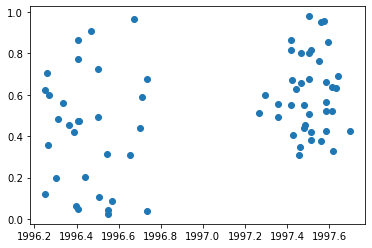

In [130]:
plt.plot(
    df["numdate"],
    df["random"],
    "o"
)

In [128]:
df = df[df["frequency"] > 0.001].copy()

In [132]:
df.head()

,strain,timepoint,raw_date,numdate,frequency,aa_sequence,random
0,A/Fujian/126/1996,1996-10-01,1996-05-01,1996.334018,0.004375,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.561831
1,A/Fujian/152/1996,1996-10-01,1996-05-20,1996.386037,0.009079,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.421079
2,A/Fujian/202/1996,1996-10-01,1996-07-02,1996.503765,0.033065,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.723539
6,A/Guangxi/9/1996,1996-10-01,1996-04-05,1996.262834,0.001376,MKTIIALSYILCLVFAQKLPENDNSTATLCLGHHAVPNGTLVKTIT...,0.358226
7,A/Guangzhou/44/1996,1996-10-01,1996-06-09,1996.440794,0.017622,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.202467


## Calculate earth mover's distance (EMD) between strains in adjacent timepoints

In [133]:
df_i = df.query(f"timepoint == '{timepoints[0]}'")
df_j = df.query(f"timepoint == '{timepoints[1]}'")

In [134]:
df_i.shape

(31, 7)

In [135]:
df_j.shape

(39, 7)

In [136]:
emd_distances = np.zeros((df_i.shape[0], df_j.shape[0]))

for i, (index_i, row_i) in enumerate(df_i.iterrows()):
    sequence_i = np.frombuffer(row_i["aa_sequence"].encode(), "S1")
    
    for j, (index_j, row_j) in enumerate(df_j.iterrows()):
        sequence_j = np.frombuffer(row_j["aa_sequence"].encode(), "S1")
        distance = (sequence_i != sequence_j).sum()
        
        emd_distances[i, j] = distance

In [137]:
emd_distances = emd_distances.astype(np.float32)

In [138]:
emd_distances.shape

(31, 39)

In [139]:
emd_distances

array([[10.,  7.,  8., ..., 17.,  6.,  8.],
       [21., 17., 18., ..., 25., 15., 13.],
       [12.,  8., 10., ..., 19.,  7.,  8.],
       ...,
       [10.,  6.,  8., ..., 17.,  4.,  8.],
       [ 8.,  5.,  8., ..., 15.,  5.,  6.],
       [ 8.,  5., 10., ..., 17.,  7.,  8.]], dtype=float32)

In [140]:
strains_i = df_i["strain"].values
strains_j = df_j["strain"].values

In [141]:
frequencies_i = df_i["frequency"].values.astype(np.float32)
frequencies_j = df_j["frequency"].values.astype(np.float32)

In [142]:
frequencies_i

array([0.004375, 0.009079, 0.033065, 0.001376, 0.017622, 0.001587,
       0.011592, 0.011592, 0.011592, 0.011592, 0.048034, 0.048034,
       0.010456, 0.023578, 0.01282 , 0.033065, 0.033872, 0.083494,
       0.088601, 0.0947  , 0.09589 , 0.098113, 0.098113, 0.001133,
       0.001311, 0.001133, 0.002992, 0.05379 , 0.002624, 0.006756,
       0.046156], dtype=float32)

In [143]:
frequencies_j

array([0.039773, 0.013636, 0.02368 , 0.004014, 0.009128, 0.009128,
       0.00943 , 0.012111, 0.015287, 0.022045, 0.022045, 0.022045,
       0.022045, 0.024239, 0.032657, 0.038466, 0.047513, 0.048138,
       0.051181, 0.053492, 0.06253 , 0.001009, 0.00153 , 0.004014,
       0.009128, 0.010378, 0.014446, 0.01572 , 0.017528, 0.017528,
       0.018966, 0.024239, 0.034573, 0.034573, 0.040427, 0.040427,
       0.043035, 0.046884, 0.039773], dtype=float32)

In [144]:
emd, _, flow = cv2.EMD(
    frequencies_i,
    frequencies_j,
    cv2.DIST_USER,
    cost=emd_distances
)

In [145]:
emd

8.809279441833496

In [146]:
flow = np.round(flow, 3)

In [147]:
flow.shape

(31, 39)

In [148]:
nonzero_flow_pairs = np.nonzero(flow)

In [149]:
nonzero_flow_pairs

(array([ 0,  1,  1,  2,  2,  2,  3,  4,  5,  6,  7,  8,  8,  8,  9, 10, 10,
        11, 11, 12, 13, 13, 13, 14, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17,
        17, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21,
        21, 21, 22, 22, 22, 23, 24, 25, 26, 27, 27, 27, 28, 29, 30, 30, 30]),
 array([24, 18, 20,  9, 11, 16, 21, 18,  9, 16, 12,  4,  6,  9, 16, 16, 17,
        10, 38, 13,  4,  5, 13, 20, 17, 20,  6,  7,  8,  3, 18, 26, 27, 30,
        36, 31, 33, 34,  0,  1,  3, 14, 23, 25, 29, 28, 34, 35, 36,  0,  2,
        24, 37, 18, 19, 32,  8,  8,  9, 11, 11, 12, 15, 37, 20, 20, 22, 38]))

In [150]:
nonzero_flow_pairs[0].shape

(68,)

In [151]:
nonzero_flow = flow[nonzero_flow_pairs]

In [152]:
nonzero_flow.shape

(68,)

In [153]:
flow_records = []

for i, (index_i, index_j) in enumerate(np.transpose(nonzero_flow_pairs)):
    flow_records.append({
        "strain": strains_i[index_i],
        "other_strain": strains_j[index_j],
        "flow": nonzero_flow[i]
    })

In [154]:
flow_df = pd.DataFrame(flow_records)

In [155]:
flow_df.head()

,strain,other_strain,flow
0,A/Fujian/126/1996,A/Malaysia/12726/1997,0.004
1,A/Fujian/152/1996,A/HongKong/CUHK22048/1997,0.008
2,A/Fujian/152/1996,A/HongKong/CUHK22736/1997,0.001
3,A/Fujian/202/1996,A/HongKong/CUHK20199/1997,0.016
4,A/Fujian/202/1996,A/HongKong/CUHK20217/1997,0.014


## Calculate t-SNE position of strains in one dimension

In [156]:
df_records = df.to_dict("records")

In [157]:
distances = []

for i in range(len(df_records)):
    sequence_i = np.frombuffer(df_records[i]["aa_sequence"].encode(), "S1")
    
    for j in range(i + 1, len(df_records)):
        sequence_j = np.frombuffer(df_records[j]["aa_sequence"].encode(), "S1")
        distance = (sequence_i != sequence_j).sum()
        
        distances.append(distance)

In [158]:
distances = np.array(distances)

In [159]:
distances.shape

(2415,)

In [160]:
squareform(distances).shape

(70, 70)

In [161]:
distance_matrix = squareform(distances)

In [168]:
tsne = TSNE(n_components=1, learning_rate=500, metric="precomputed", random_state=314)
X_embedded_1d = tsne.fit_transform(distance_matrix)

In [169]:
X_embedded_1d.shape

(70, 1)

In [170]:
df["tsne_1d"] = X_embedded_1d

In [171]:
df.head()

,strain,timepoint,raw_date,numdate,frequency,aa_sequence,random,tsne_1d
0,A/Fujian/126/1996,1996-10-01,1996-05-01,1996.334018,0.004375,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.561831,-2230.753418
1,A/Fujian/152/1996,1996-10-01,1996-05-20,1996.386037,0.009079,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.421079,2623.712891
2,A/Fujian/202/1996,1996-10-01,1996-07-02,1996.503765,0.033065,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.723539,-4065.971191
6,A/Guangxi/9/1996,1996-10-01,1996-04-05,1996.262834,0.001376,MKTIIALSYILCLVFAQKLPENDNSTATLCLGHHAVPNGTLVKTIT...,0.358226,1954.306152
7,A/Guangzhou/44/1996,1996-10-01,1996-06-09,1996.440794,0.017622,MKTIIALSYILCLVFAQKLPGNDNSTATLCLGHHAVPNGTLVKTIT...,0.202467,2164.215332


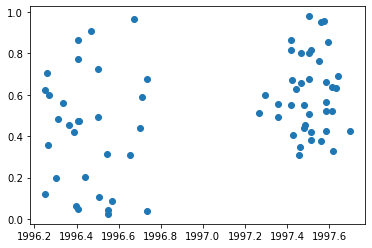

In [172]:
plt.plot(
    df["numdate"],
    df["random"],
    "o"
)

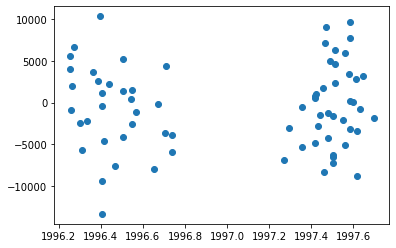

In [173]:
plt.plot(
    df["numdate"],
    df["tsne_1d"],
    "o"
)

In [174]:
minimal_df = df.drop(columns=["aa_sequence"])

In [228]:
minimal_df = minimal_df.sort_values(["timepoint", "frequency"])

In [229]:
minimal_df["timepoint_occurrence"] = minimal_df.groupby("timepoint")["strain"].cumcount()

In [230]:
counts_by_timepoint = minimal_df.groupby("timepoint")["strain"].count().reset_index().rename(columns={"strain": "count"})

In [231]:
counts_by_timepoint

,timepoint,count
0,1996-10-01,31
1,1997-10-01,39


In [232]:
minimal_df = minimal_df.merge(
    counts_by_timepoint,
    on="timepoint"
)

In [233]:
minimal_df["y_position"] = (minimal_df["timepoint_occurrence"]) / minimal_df["count"]

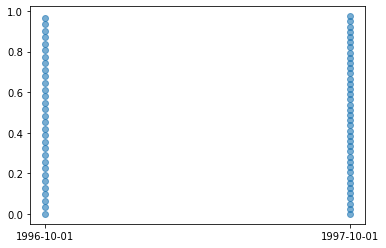

In [234]:
plt.plot(
    minimal_df["timepoint"],
    (minimal_df["timepoint_occurrence"]) / minimal_df["count"],
    "o",
    alpha=0.6
)

In [235]:
minimal_df = minimal_df.drop(columns=["count"])

## Join minimal data frame with flow pairs

In [236]:
minimal_df.head()

,strain,timepoint,raw_date,numdate,frequency,random,tsne_1d,timepoint_occurrence,y_position
0,A/NewYork/608/1996,1996-10-01,1996-04-01,1996.251882,0.001133,0.621442,3992.201416,0,0.000000
1,A/NewYork/652/1996,1996-10-01,1996-04-01,1996.251882,0.001133,0.119385,5583.456055,1,0.032258
2,A/NewYork/631/1996,1996-10-01,1996-04-04,1996.260096,0.001311,0.704939,-913.826172,2,0.064516
3,A/Guangxi/9/1996,1996-10-01,1996-04-05,1996.262834,0.001376,0.358226,1954.306152,3,0.096774
4,A/Guangzhou/9/1996,1996-10-01,1996-04-08,1996.271047,0.001587,0.601287,6627.901367,4,0.129032


In [237]:
flow_df.head()

,strain,other_strain,flow
0,A/Fujian/126/1996,A/Malaysia/12726/1997,0.004
1,A/Fujian/152/1996,A/HongKong/CUHK22048/1997,0.008
2,A/Fujian/152/1996,A/HongKong/CUHK22736/1997,0.001
3,A/Fujian/202/1996,A/HongKong/CUHK20199/1997,0.016
4,A/Fujian/202/1996,A/HongKong/CUHK20217/1997,0.014


In [238]:
paired_df = minimal_df.merge(
    flow_df,
    on="strain",
    how="left"
)

In [239]:
paired_df.head()

,strain,timepoint,raw_date,numdate,frequency,random,tsne_1d,timepoint_occurrence,y_position,other_strain,flow
0,A/NewYork/608/1996,1996-10-01,1996-04-01,1996.251882,0.001133,0.621442,3992.201416,0,0.000000,A/HongKong/CUHK20010/1997,0.001
1,A/NewYork/652/1996,1996-10-01,1996-04-01,1996.251882,0.001133,0.119385,5583.456055,1,0.032258,A/HongKong/CUHK20199/1997,0.001
2,A/NewYork/631/1996,1996-10-01,1996-04-04,1996.260096,0.001311,0.704939,-913.826172,2,0.064516,A/HongKong/CUHK20010/1997,0.001
3,A/Guangxi/9/1996,1996-10-01,1996-04-05,1996.262834,0.001376,0.358226,1954.306152,3,0.096774,A/HongKong/CUHK4622/1997,0.001
4,A/Guangzhou/9/1996,1996-10-01,1996-04-08,1996.271047,0.001587,0.601287,6627.901367,4,0.129032,A/HongKong/CUHK20199/1997,0.002


In [240]:
full_df = paired_df.merge(
    minimal_df,
    left_on="other_strain",
    right_on="strain",
    suffixes=["", "_other"],
    how="left"
)

In [241]:
full_df = np.round(full_df, 4)

In [242]:
full_df["strain_occurrence"] = full_df.groupby("strain")["strain"].cumcount()

In [243]:
full_df.head()

,strain,timepoint,raw_date,numdate,frequency,random,tsne_1d,timepoint_occurrence,y_position,other_strain,...,strain_other,timepoint_other,raw_date_other,numdate_other,frequency_other,random_other,tsne_1d_other,timepoint_occurrence_other,y_position_other,strain_occurrence
0,A/NewYork/608/1996,1996-10-01,1996-04-01,1996.2519,0.0011,0.6214,3992.201660,0,0.0000,A/HongKong/CUHK20010/1997,...,A/HongKong/CUHK20010/1997,1997-10-01,1997-06-19,1997.4654,0.0153,0.6568,7087.107422,12.0,0.3077,0
1,A/NewYork/652/1996,1996-10-01,1996-04-01,1996.2519,0.0011,0.1194,5583.456055,1,0.0323,A/HongKong/CUHK20199/1997,...,A/HongKong/CUHK20199/1997,1997-10-01,1997-07-03,1997.5038,0.0220,0.6782,-6265.848145,17.0,0.4359,0
2,A/NewYork/631/1996,1996-10-01,1996-04-04,1996.2601,0.0013,0.7049,-913.826172,2,0.0645,A/HongKong/CUHK20010/1997,...,A/HongKong/CUHK20010/1997,1997-10-01,1997-06-19,1997.4654,0.0153,0.6568,7087.107422,12.0,0.3077,0
3,A/Guangxi/9/1996,1996-10-01,1996-04-05,1996.2628,0.0014,0.3582,1954.306152,3,0.0968,A/HongKong/CUHK4622/1997,...,A/HongKong/CUHK4622/1997,1997-10-01,1997-04-08,1997.2683,0.0010,0.5114,-6861.476074,0.0,0.0000,0
4,A/Guangzhou/9/1996,1996-10-01,1996-04-08,1996.2710,0.0016,0.6013,6627.901367,4,0.1290,A/HongKong/CUHK20199/1997,...,A/HongKong/CUHK20199/1997,1997-10-01,1997-07-03,1997.5038,0.0220,0.6782,-6265.848145,17.0,0.4359,0


In [244]:
full_df[full_df["flow"] == 0]

,strain,timepoint,raw_date,numdate,frequency,random,tsne_1d,timepoint_occurrence,y_position,other_strain,...,strain_other,timepoint_other,raw_date_other,numdate_other,frequency_other,random_other,tsne_1d_other,timepoint_occurrence_other,y_position_other,strain_occurrence


In [245]:
full_df.to_csv(
    "../results/emd_example.csv",
    sep=",",
    index=False,
    header=True
)